# Random Forest Project

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
<table>
<tr>
<td>credit.policy</td>
<td>1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.</td>
</tr>
<tr>
<td>purpose</td>
<td>The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").</td>
</tr>
<tr>
<td>int.rate</td>
<td>The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.</td>
</tr>
<tr>
<td>installment</td>
<td>The monthly installments owed by the borrower if the loan is funded.</td>
</tr>
<tr>
<td>log.annual.inc</td>
<td>The natural log of the self-reported annual income of the borrower.</td>
</tr>
<tr>
<td>dti</td>
<td>The debt-to-income ratio of the borrower (amount of debt divided by annual income).</td>
</tr>
<tr>
<td>fico</td>
<td>The FICO credit score of the borrower.</td>
</tr>
<tr>
<td>days.with.cr.line</td>
<td>The number of days the borrower has had a credit line.</td>
</tr>
<tr>
<td>revol.bal</td>
<td>The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).</td>
</tr>
<tr>
<td>revol.util</td>
<td>The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).</td>
</tr>
<tr>
<td>inq.last.6mths</td>
<td>The borrower's number of inquiries by creditors in the last 6 months.</td>
</tr>
<tr>
<td>delinq.2yrs</td>
<td>The number of times the borrower had been 30+ days past due on a payment in the past 2 years.</td>
</tr>
<tr>
<td>pub.rec</td>
<td>The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).</td>
</tr>
</table>

<hr>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

<hr>

## Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [4]:
loan_data = pd.read_csv('files/loan_data.csv')
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Check out the info() and describe() methods on loans.**

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<hr>

## Exploratory Data Analysis


**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

<AxesSubplot: xlabel='fico', ylabel='Count'>

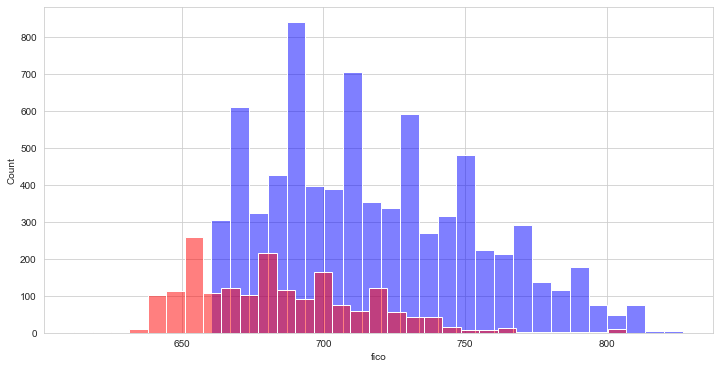

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(loan_data[loan_data['credit.policy']==1], x='fico', bins=30, color='blue', alpha=0.5)
sns.histplot(loan_data[loan_data['credit.policy']==0], x='fico', bins=30, color='red', alpha=0.5)

**Create a similar figure, except this time select by the not.fully.paid column.**

<AxesSubplot: xlabel='fico', ylabel='Count'>

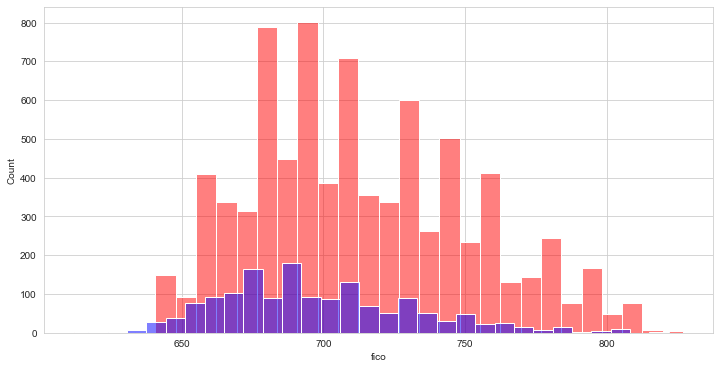

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(loan_data[loan_data['not.fully.paid']==0], x='fico', bins=30, color='red', alpha=0.5)
sns.histplot(loan_data[loan_data['not.fully.paid']==1], x='fico', bins=30, color='blue', alpha=0.5)

**Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**

<AxesSubplot: xlabel='purpose', ylabel='count'>

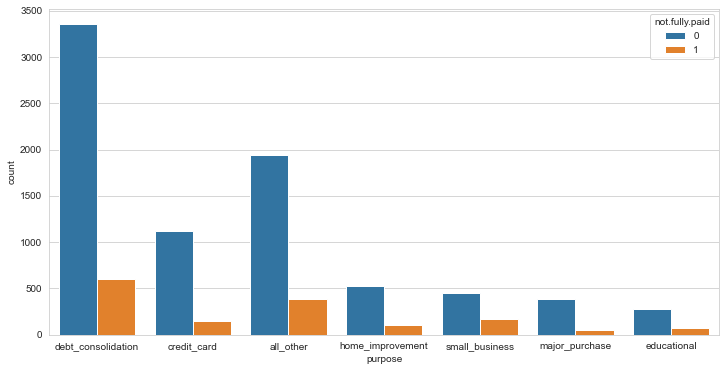

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(data=loan_data, x='purpose', hue='not.fully.paid')

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

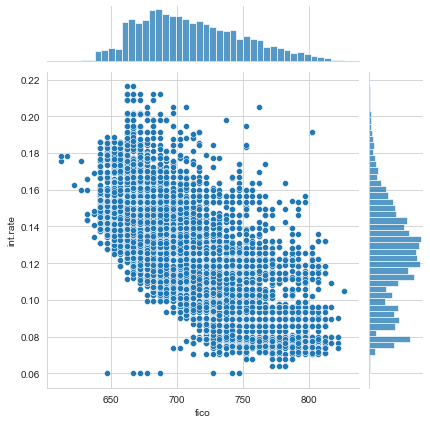

In [40]:
sns.jointplot(data=loan_data, x='fico', y='int.rate')

**Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

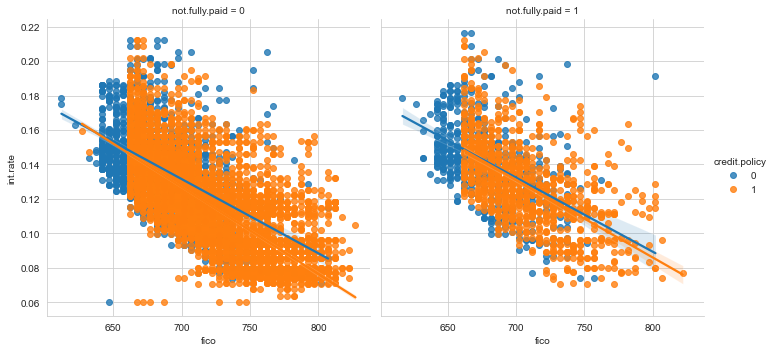

In [52]:
sns.lmplot(data=loan_data, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid')

<hr>

## Setting up the Data

In [54]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

In [59]:
loan_data = pd.get_dummies(loan_data, columns=['purpose'], drop_first=True)
loan_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Train Test Split
**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
X = loan_data.drop('not.fully.paid', axis=1)
y = loan_data['not.fully.paid']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<hr>

## Training and Evaluation a Decision Tree

**Train and predict the test set and create a classification report and a confusion matrix.**

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dtree = DecisionTreeClassifier()

In [67]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
dtree_pred = dtree.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
print(confusion_matrix(y_test, dtree_pred))

[[1986  384]
 [ 373  131]]


In [71]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2370
           1       0.25      0.26      0.26       504

    accuracy                           0.74      2874
   macro avg       0.55      0.55      0.55      2874
weighted avg       0.74      0.74      0.74      2874



<hr>

## Training and Evaluation a Random Forest model

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rfc = RandomForestClassifier(n_estimators=500)

In [98]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [99]:
rfc_preds = rfc.predict(X_test)

In [100]:
print(confusion_matrix(y_test, rfc_preds))

[[2366    4]
 [ 499    5]]


In [101]:
print(classification_report(y_test, rfc_preds))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90      2370
           1       0.56      0.01      0.02       504

    accuracy                           0.82      2874
   macro avg       0.69      0.50      0.46      2874
weighted avg       0.78      0.82      0.75      2874



<hr>